# Random Maze


In [1]:
H = Bool[0 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 1 1 1 0 1; 0 1 0 1 1; 1 0 0 0 0];
V = Bool[1 0 1 1 1 0; 0 1 0 0 1 1; 0 0 0 0 1 0; 0 1 0 1 0 0; 0 0 1 0 1 0];

In [2]:
using PyPlot, Random

function plot_maze(H,V)
    clf()
    axis("off")
    axis("equal")
    n = size(H,1)
    plot([0,n,n,0,0], [0,0,n,n,0], color="k")
    
    for x = 1:n-1, y = 1:n
        if V[x,y]
            plot([x,x], [y-1,y], color="k")
        end
    end
    for x = 1:n, y = 1:n-1
        if H[x,y]
            plot([x-1,x], [y,y], color="k")
        end
    end
end

function plot_cell_indices(n)
    for i = 1:n
        for j = 1:n
            text(i-0.5, j-0.5, "($i,$j)",
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=8)
        end
    end
end

plot_cell_indices (generic function with 1 method)

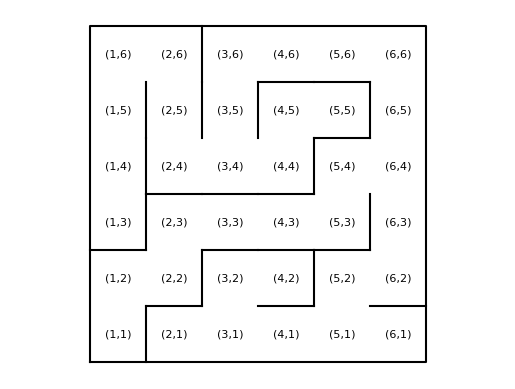

In [3]:
plot_maze(H,V)
plot_cell_indices(size(H,1))

In addition, we will find paths between the points `1,n` and `n,1`, which can be stored in two arrays of integers. For the example above, this path is given by

In [4]:
x = [6, 5, 5, 6, 6, 6, 6, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1];
y = [1, 1, 2, 2, 3, 4, 5, 6, 6, 6, 6, 5, 4, 4, 5, 6, 6];

and it can be plotted along with the maze using the commands:

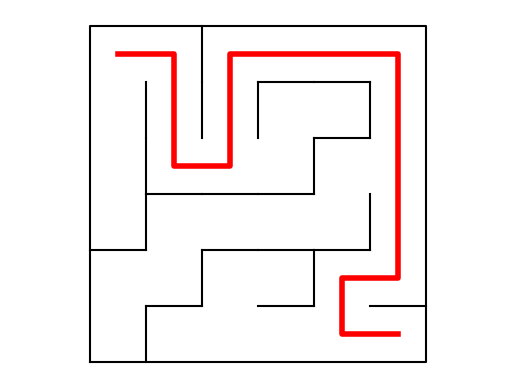

In [5]:
plot_maze(H,V);
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);

### Generate random maze


```julia
H,V = make_maze(n)
```

which produces a random maze of size `n`-by-`n`


In [6]:
 function make_maze(n)
    H = ones(Bool,n,n-1)
    V = ones(Bool,n-1, n)
    visit = falses(n,n)
    function dig(x,y)
    
    visit[x,y] = true
    directions = randperm(4)
    for i in directions
    if i == 1 && x<=n && y<n &&visit[x,y+1] == false
        H[x,y] = 0
        visit[x,y+1] = true
        dig(x,y+1)
    end
    if i == 2 && x<=n && 1<y<=n && visit[x,y-1] == false 
        H[x,y-1] =  0
        visit[x,y-1] = true
        dig(x,y-1)
    end
    if i == 3 && x<n && y<=n && visit[x+1,y] == false
        V[x,y] =  0
        visit[x+1,y] = true
        dig(x+1,y)
    end
    if i == 4 && 1<x<=n && y<=n && visit[x-1,y] == false
        V[x-1,y] =  0
        visit[x-1,y] = true
        dig(x-1,y)
        end
    end
end                  
    dig(1,1)
    return H,V
end
            
        

make_maze (generic function with 1 method)

### Find path from `1,n` to `n,1`

Next, write a function with the syntax

```julia
pathx, pathy = find_path(H,V)
```

which finds a path in the maze `H,V` between the coordinates `1,n` and `n,1`



In [7]:
function find_path(H,V)
    n = size(H,1)
    visit = falses(n,n)
    pathx = []
    pathy = []
    function recur(x,y)
        if x == n && y == 1
            push!(pathx,x)
            push!(pathy,y)
            return true 
        else 
            p_o = []
            if x<=n && y<n &&visit[x,y+1] == false && H[x,y] == 0
                visit[x,y] = true
                if recur(x,y+1) == true
                    push!(p_o, true)
                end
            end
            if  x<=n && 1<y<=n && visit[x,y-1] == false && H[x,y-1] == 0
                visit[x,y] = true
                if recur(x,y-1) == true
                    push!(p_o, true)
                end
            end
            if  x<n && y<=n && visit[x+1,y] == false && V[x,y] == 0
                visit[x,y] = true
                if recur(x+1,y) == true
                    push!(p_o, true)
                end
            end
            if  1<x<=n && y<=n && visit[x-1,y] == false && V[x-1,y] == 0
                visit[x,y] = true
                if recur(x-1,y) == true
                    push!(p_o, true)
                    end
                end
            end
            if true in p_o
                push!(pathx,x)
                push!(pathy,y)
                return true
            end
    end
    recur(1,n)
    return pathx, pathy
end

find_path (generic function with 1 method)

### Large maze test



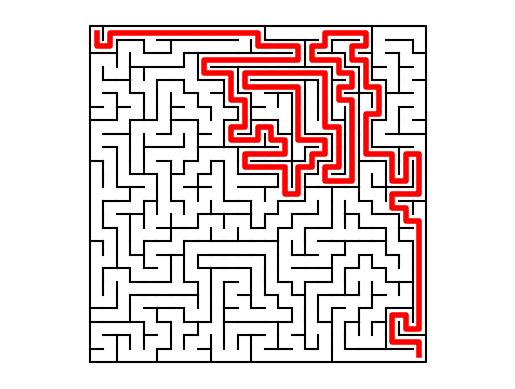

In [8]:
n = 25
H,V = make_maze(n)
plot_maze(H,V)
x, y = find_path(H,V)
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);